In [1]:
import pandas as pd

In [2]:
path= '/content/drive/MyDrive/Colab Notebooks/books_1.Best_Books_Ever.csv'
df= pd.read_csv(path)

In [3]:
df= df.drop(['edition'], axis= 1).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9881 entries, 1 to 52475
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            9881 non-null   object 
 1   title             9881 non-null   object 
 2   series            9881 non-null   object 
 3   author            9881 non-null   object 
 4   rating            9881 non-null   float64
 5   description       9881 non-null   object 
 6   language          9881 non-null   object 
 7   isbn              9881 non-null   object 
 8   genres            9881 non-null   object 
 9   characters        9881 non-null   object 
 10  bookFormat        9881 non-null   object 
 11  pages             9881 non-null   object 
 12  publisher         9881 non-null   object 
 13  publishDate       9881 non-null   object 
 14  firstPublishDate  9881 non-null   object 
 15  awards            9881 non-null   object 
 16  numRatings        9881 non-null   int64  

---
## Προεπεξεργασία

In [4]:
import numpy as np

In [5]:
df['ratingsByStars']

1        ['1593642', '637516', '222366', '39573', '14526']
4        ['1751460', '1113682', '1008686', '542017', '5...
8                ['78217', '22857', '6628', '1477', '967']
17          ['183179', '155059', '91573', '21360', '7128']
21       ['1409189', '882493', '434381', '123286', '569...
                               ...                        
52453                ['1815', '2239', '2442', '553', '99']
52459                    ['251', '329', '266', '62', '12']
52466                    ['920', '708', '262', '48', '20']
52472                    ['442', '384', '142', '48', '12']
52475               ['2109', '1868', '1660', '647', '390']
Name: ratingsByStars, Length: 9881, dtype: object

ratingsByStars

In [6]:
Rn= ['ratingStar5', 'ratingStar4', 'ratingStar3', 'ratingStar2', 'ratingStar1']

In [7]:
df[Rn]= df['ratingsByStars'].str.split(",", expand= True)

df[['ratingStar1',6]]= df['ratingStar1'].str.split("]", expand= True)
df[[6,'ratingStar5']]= df['ratingStar5'].str.split("[", expand= True)

for R in Rn:
  df[[6,R,6]]= df[R].str.split("'", expand= True)     # df[6] dummy column

df= df.drop([6], axis=1)
df= df.drop(['ratingsByStars'], axis= 1)
df= df.dropna()

In [8]:
for R in Rn:
  df[R]= df[R].astype(int)

genres

 αφαίρεση του '[' στην αρχή της λίστας genre, μετά χωρίζουμε τα genre με ','. Τέλος, επιλέγουμε το πρώτο (position [0])

In [9]:
df['genreSingle']= df['genres'].str.split("[", expand= True)[1].str.split(",",expand= True)[0]
df['genreSingle']

1            'Fantasy'
4        'Young Adult'
8            'Fantasy'
17          'Classics'
21       'Young Adult'
             ...      
52453        'Fantasy'
52459        'Science'
52466        'Fantasy'
52472        'Romance'
52475        'Fantasy'
Name: genreSingle, Length: 9875, dtype: object

Έτος Έκδοσης

In [10]:
df = df[df['publishDate'] != 'Published']

In [11]:
df['year_of_publishing']= pd.to_datetime(df['publishDate']).dt.year
df[['publishDate','year_of_publishing']].head(10)

,publishDate,year_of_publishing
1,09/28/04,2004
4,09/06/06,2006
8,09/25/12,2012
17,12/01/00,2000
21,02/28/12,2012
29,09/30/04,2004
31,05/06/03,2003
37,05/12/86,1986
42,03/01/06,2006
45,11/07/17,2017


---
## Ερωτήματα: 2 - 4 - 5 - 6 - 10

In [12]:
import matplotlib.pyplot as plt

### 2.

Αρχικά, η στήλη pages μετατρέπεται σε int αφού κρατάει αριθμό σελιδών.

In [13]:
df.loc[df['pages'] == '1 page',['pages']]= 1
df['pages']= df['pages'].astype(int)

In [14]:
df[['title','pages']].sort_values(by='pages', ascending= False).head(10)

,title,pages
11490,The Story of Civilization,14777
14949,The Second World War,4736
1592,In Search of Lost Time,4211
2899,A Song of Ice and Fire,4081
2486,The Complete Wreck,3417
2286,Harry Potter Collection,3342
32615,The Unwanteds Complete Collection,3312
1959,The Civil War: A Narrative,2934
5072,The Inheritance Cycle,2912
2904,The Twilight Saga Complete Collection,2752


### 4.

In [15]:
stopwords = ['the','of','a','and','to','in','on','as','an','for','is','you','at','my','i','vol','volume','1','1:','2','&','with','de','la','/','by','from']

In [16]:
# κώδικας φροντιστηρίου

def wordcount(s, lim):
    wordlist = []
    countlist = []
    
    s = s.replace('.','')
    s = s.replace(',','')
    
    s = s.split()
    
    for word in s:
      if not word.lower() in stopwords:
        if not word.lower() in wordlist:
            wordlist.append(word.lower())
            countlist.append(1)
        else:
            for j in range(len(wordlist)):
                if wordlist[j] == word.lower():
                    countlist[j] = countlist[j] + 1
                    break
                    
    wordlist2 = []
    countlist2 = []
    
    for i in range(0,len(wordlist)):
        if i <= (len(countlist)) and countlist[i] > lim:
            wordlist2.append(wordlist[i])
            countlist2.append(countlist[i])
                    
    return wordlist2,countlist2

In [17]:
Titles= df['title'].tolist()
Titles= str.join(' ',Titles)

wl, wc= wordcount(Titles, 50) # όλες οι λέξεις που εμφανίζονται πάνω από 50 φορές στους τίτλους των βιβλίων

<BarContainer object of 25 artists>

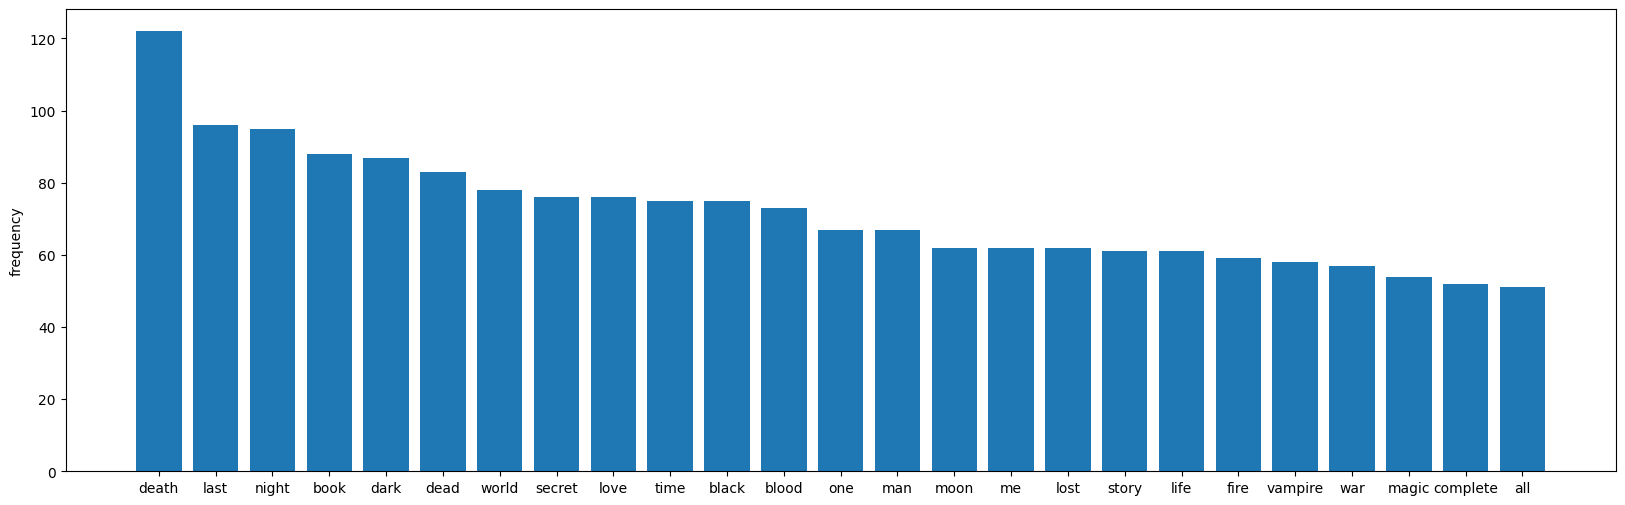

In [18]:
fig = plt.figure(figsize=(20,6))

wc, wl = zip(*sorted(zip(wc, wl),reverse=True))

plt.ylabel('frequency')
plt.bar(wl,wc)

### 5.

In [19]:
grouped = df.groupby(["author"])
grouped.size().sort_values(ascending= False).head(10)

author
Agatha Christie                         51
Terry Pratchett                         37
Enid Blyton                             35
Piers Anthony                           30
Mercedes Lackey                         30
P.G. Wodehouse                          29
Bonnie Bryant                           29
Cynthia Harrod-Eagles                   29
CLAMP, William Flanagan (Translator)    28
Terry Brooks (Goodreads Author)         28
dtype: int64

### 6.

In [20]:
grouped = df.groupby(["author"])
grouped['numRatings'].sum().sort_values(ascending= False).head(10)

author
J.K. Rowling, Mary GrandPré (Illustrator)    8094801
Stephenie Meyer                              6155346
George R.R. Martin                           4299155
J.R.R. Tolkien                               3693214
Veronica Roth (Goodreads Author)             2912294
Terry Pratchett                              2812937
Rick Riordan (Goodreads Author)              2762007
Dan Brown (Goodreads Author)                 2675792
Agatha Christie                              2527784
Lois Lowry (Goodreads Author)                2060949
Name: numRatings, dtype: int64

### 10.

Παρατηρούμε ότι η σχέση της pages και rating είναι αδύναμη.

In [21]:
df[['rating','pages']].corr()

,rating,pages
rating,1.000000,0.154554
pages,0.154554,1.000000


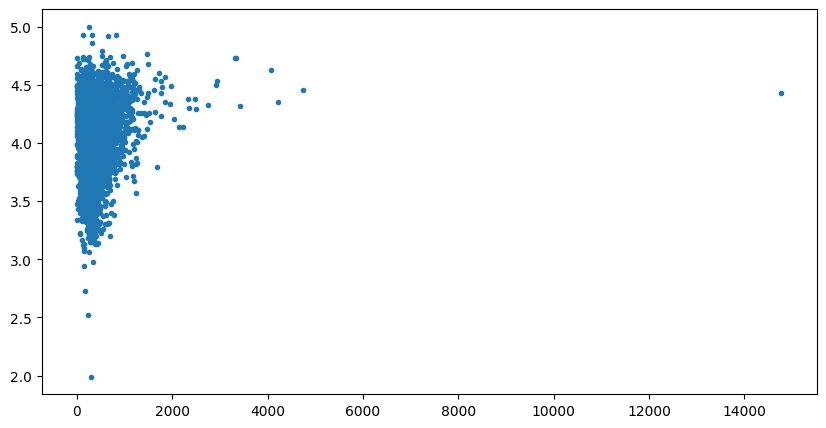

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(df['pages'], df['rating'], marker='.')

In [23]:
n= 1000

In [24]:
pr0= df.loc[df['pages'] <= n, ['rating','pages']]
pr1= df.loc[df['pages'] > n, ['rating','pages']]

In [25]:
print(pr0['rating'].mean())

4.024377381810692


In [26]:
print(pr1['rating'].mean())

4.301724137931035


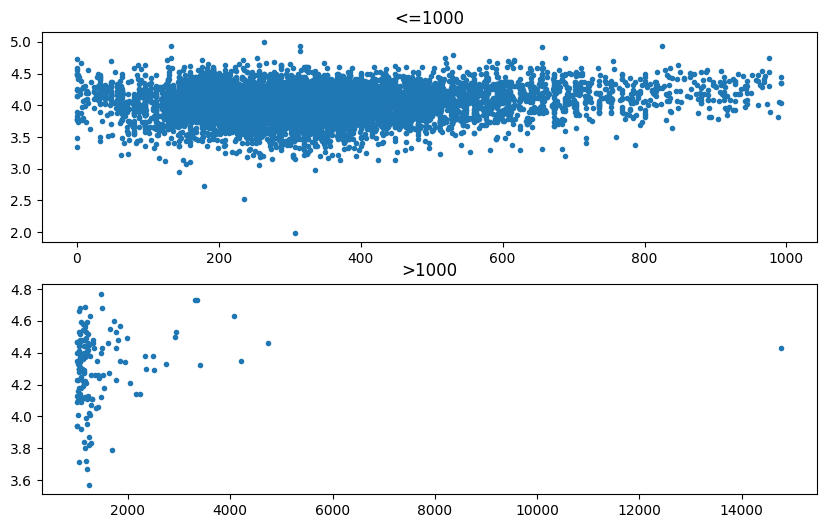

In [27]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.title.set_text('<='+str(n))
ax2.title.set_text('>'+str(n))

ax1.scatter(pr0['pages'],pr0['rating'], marker='.')
ax2.scatter(pr1['pages'],pr1['rating'], marker='.')

 Πράγματι, για αύξηση του αριθμού σελιδών, υπάρχει μικρή αύξηση στη βαθμολόγηση. Επομένως, τα βιβλία με τις περισσότερες σελίδες έχουν ελαφρώς υψηλότερη βαθμολογία

---
## Recommendation system 

In [28]:
df_en= df[df['language']== 'English']

In [29]:
names= df_en['title'].to_list()
corpus= df_en['description'].to_list()
ids= df_en['bookId'].to_list()

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
vtfid = TfidfVectorizer(stop_words='english', min_df= 0.01)     # the higher min_df -> more accurate results -> less variety. min_df must be balanced
Xarr= vtfid.fit_transform(corpus).toarray()

In [32]:
Similarity= cosine_similarity(Xarr)     # για κάθε βιβλίο, κρατάμε την cosine_similarity τιμή για όλα τα βιβλία (n x n)

~2m για 9k βιβλία

In [36]:
top= dict()
for i in range(len(corpus)):
  s= Similarity[i]

  final= list(zip(names, corpus, s))
  final.sort(key=lambda a: a[2], reverse= True)

  top.update({ids[i]:final[1:101]})   # ξεκινάμε από το 2ο βιβλίο, ώστε να μην κάνει recommend το εαυτό του

Η συνάρτηση Recommend παίρνει επίσης όρισμα dictionary (**top**), ώστε να χρησιμοποιηθεί η ίδια συνάρτηση και για τα δύο dictionaries.

In [37]:
def recommend(item_id, num, top):
  id= df_en[df_en['bookId'].str.contains("^"+item_id+"\\D",regex=True)]['bookId'].values[0]
  bookttl= df_en[df_en['bookId'] == id]['title'].values[0]

  print("Recommending", num, "books similar to:", bookttl,'\n---------------------------------------------------------')
  
  this= top[id]
  for i in range(num):
    print("Recommended:", this[i][0])
    print("Description:", this[i][1])
    print("(score):", this[i][2],'\n')


In [90]:
df_en[df_en['bookId'] == '41865.Twilight']['description'].to_list()

["About three things I was absolutely positive.\n\nFirst, Edward was a vampire.\n\nSecond, there was a part of him—and I didn't know how dominant that part might be—that thirsted for my blood.\n\nAnd third, I was unconditionally and irrevocably in love with him.\n\nDeeply seductive and extraordinarily suspenseful, Twilight is a love story with bite."]

Recommend κάτι παρόμοιο με το παραπάνω

In [91]:
recommend('41865', 5, top)

Recommending 5 books similar to: Twilight 
---------------------------------------------------------
Recommended: The Twilight Saga Complete Collection
Description: This stunning set, complete with five editions of Twilight, New Moon, Eclipse, Breaking Dawn, and The Short Second Life of Bree Tanner: An Eclipse Novella, makes the perfect gift for fans of the bestselling vampire love story.

Deeply romantic and extraordinarily suspenseful, The Twilight Saga capture the struggle between defying our instincts and satisfying our desires.
(score): 0.3256720419813307 

Recommended: The Bitten
Description: The Bitten is the fourth daring and pulse-pounding book in L. A. Banks's Vampire Huntress Legend seriesThe vampire civil war has been averted, deadly were-demons have been beaten back, and now it Damali Richards and Carlos Rivera (now a Council level vampire) will finally have the chance to settle in and explore their deeper, sexier love.But Carlos and Damali should know by now that there is

In [92]:
recommend('570393', 5, top)

Recommending 5 books similar to: GTO: Great Teacher Onizuka, Vol. 1 
---------------------------------------------------------
Recommended: Ramona Quimby, Age 8
Description: Mr. Quimby's going to college, Mrs. Quimby's going to work. Now that Ramona is eight, she can go to a new school with a new teacher and ride the bus all by herself. But after school she has to stay with Grandmother Kemp and be nice to that bratty little Willa Jean until Beezus�who's tempermental enough to ruin anyone's day�comes to take her home. Life isn't as easy for Ramona as it used to be. All the Quimbys have to adjust, and Ramona gets her chance to prove that she's "big enough for her family to depend on."
(score): 0.3483275840851374 

Recommended: If I Die
Description: The entire school's talking about the gorgeous new math teacher, Mr. Beck. Everyone except Kaylee Cavanaugh. After all, Kaylee's no ordinary high-school junior. She's a banshee—she screams when someone dies.But the next scream might be for Kay

In [58]:
vtfidbin = TfidfVectorizer(stop_words='english', min_df= 0.0008, ngram_range= (2,2))
Xarrbin= vtfidbin.fit_transform(corpus).toarray()

Similaritybin= cosine_similarity(Xarrbin)

In [59]:
print(Xarr.shape,Xarrbin.shape)

(9395, 1110) (9395, 2242)


In [60]:
topbin= dict()
for i in range(len(corpus)):
  s= Similaritybin[i]

  final= list(zip(names, corpus, s))
  final.sort(key=lambda a: a[2], reverse= True)

  topbin.update({ids[i]:final[1:101]})

In [93]:
recommend('41865', 5, topbin)

Recommending 5 books similar to: Twilight 
---------------------------------------------------------
Recommended: Street of the Five Moons
Description: What did it all mean? The note with the hieroglyphs was found in the pocket of a man lying dead in an alley. The only other item of interest was a piece of jewelry, a reproduction of the Charlemagne talisman. It was good, so good that Vicky Bliss thought she was being shown the real jewel. The goldwork was done by a master; the jewels weren’t glass but top-quality synthetic stones. What did it mean?Vicky didn’t know … yet. But on the sunbathed streets and in the moonlit courtyards of Rome, she was going to find out—if the dangerously exciting young Englishman didn’t get in her way…
(score): 0.7629201478022442 

Recommended: The Vintner's Luck
Description: One summer night in 1808, Sobran Jodeau sets out to drown his love sorrows in his family's vineyard when he stumbles on an angel. Once he gets over his shock, Sobran decides that Xas, 

In [95]:
recommend('13615', 10, topbin)

Recommending 10 books similar to: Death Note, Vol. 1: Boredom 
---------------------------------------------------------
Recommended: Death Note: Black Edition, Vol. 5
Description: Killer 2-for-1 value on hit thriller Death Note!Light Yagami is an ace student with great prospects—and he’s bored out of his mind. But all that changes when he finds the Death Note, a notebook dropped by rogue Shinigami death god. Any human whose name is written in the notebook dies, and now Light has vowed to use the power of the Death Note to rid the world of evil. But when criminals begin dropping dead, the authorities send the legendary detective L to track down the killer. With L hot on his heels, will Light lose sight of his noble goal…or his life?Contains Volumes 9 and 10 of 
  Death Note
! Light Yagami is an ace student with great prospects—and he’s bored out of his mind. But all that changes when he finds the Death Note, a notebook dropped by a rogue Shinigami death god. Any human whose name is wri